In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/Intern bp

/content/gdrive/MyDrive/Intern bp


In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
import pandas as pd 
x = pd.read_csv('processed_x.csv')
y = pd.read_csv('y unscaled.csv')
y_unscaled = pd.read_csv('bp_values_videos_removed.csv')

Scale the y values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y)
print(y_scaled)

[[0.95 ]
 [0.95 ]
 [0.95 ]
 [0.95 ]
 [0.95 ]
 [0.95 ]
 [0.95 ]
 [0.95 ]
 [0.95 ]
 [0.95 ]
 [0.95 ]
 [0.55 ]
 [0.55 ]
 [0.55 ]
 [0.55 ]
 [0.55 ]
 [0.55 ]
 [0.55 ]
 [0.55 ]
 [0.55 ]
 [0.55 ]
 [0.55 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [0.15 ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.45 ]
 [0.45 ]
 [0.45 ]
 [0.45 ]
 [0.45 ]
 [0.45 ]
 [0.45 ]
 [0.45 ]
 [0.45 ]
 [0.45 ]
 [0.45 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.73 ]
 [0.9  ]
 [0.9  ]
 [0.9  ]
 [0.9  ]
 [0.9  ]
 [0.9  ]
 [0.9  ]
 [0.9  ]
 [0.9  ]
 [0.9  ]
 [0.9  ]
 [0.35 ]
 [0.35 ]
 [0.35 ]
 [0.35 ]
 [0.35 ]
 [0.35 ]
 [0.35 ]
 [0.35 ]
 [0.35 ]
 [0.35 ]
 [0.35 ]
 [0.   ]
 

Format the input data to a shape which can be accepted by the model

In [ ]:
import numpy as np 
x = np.array(x).reshape((187, 6, 1))
print(x.shape)
print(y.shape)

(187, 6, 1)
(187, 1)


Get train, test and validation split


In [ ]:
from sklearn.model_selection import train_test_split
x_train_cv, x_test, y_train_cv, y_test = train_test_split(x, y, test_size=0.20, random_state=50)
x_train, x_cv, y_train, y_cv = train_test_split(x_train_cv, y_train_cv, test_size=0.25, random_state=25)

In [ ]:
# x_train = np.array(x_train).reshape((111, ))
# x_test = np.array(x_test).reshape((38, 1, 6))
# x_cv = np.array(x_cv).reshape((38, 1, 6))
print(x_train.shape, x_test.shape, x_cv.shape)

(111, 6, 1) (38, 6, 1) (38, 6, 1)


In [ ]:
print(y_train.shape, y_test.shape, y_cv.shape)

(111, 1) (38, 1) (38, 1)


Defining parameters for model

In [ ]:
epochs = 200
batch_size = 1

Model design import statements

In [ ]:
import tensorflow
from tensorflow.keras.layers import InputLayer, GRU, BatchNormalization, Conv1D, MaxPooling1D, Bidirectional, Dense, Flatten, PReLU, LSTM, ReLU, LeakyReLU, Add, Masking
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, Input
import keras 

Model design 

In [ ]:
# Model design using functional mode 
# input layer 
input = Input(shape=(6, 1))
# First convolutional block
x1 = Conv1D(filters=30, kernel_size=3, padding='causal', activation='ReLU')(input)
x2 = LeakyReLU()(x1)
x3 = MaxPooling1D(pool_size=1)(x2)
x4 = BatchNormalization()(x3)

# second convolutional block
x5 = Conv1D(filters=30, kernel_size=3, padding='causal', activation='ReLU')(x4)
x6 = ReLU()(x5)
x7 = MaxPooling1D(pool_size=1)(x6)
x8 = BatchNormalization()(x7)

# First GRU layer with batchnorm
x9 = Bidirectional(GRU(30, activation='sigmoid', return_sequences=True, dropout=0.3))(x8)
x10 = BatchNormalization()(x9)

# second GRU layer
x11 = Bidirectional(GRU(60, activation='sigmoid', return_sequences=False, dropout=0.3))(x10)
x12 = Add()([x11, input]) # skip connection

# third GRU layer 
x13 = Bidirectional(GRU(100, activation='sigmoid', return_sequences=False, dropout=0.5))(x12)

# first dense layer with batchnorm
x14 = Dense(30, activation='tanh')(x13)
x15 = Add()([x14, input]) # skip connection 
x16 = BatchNormalization()(x15)

# output layer 
x17 = Dense(1, activation='linear')(x16)
lrcn_model = Model(input, x17)

# model summary 
lrcn_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 1)]       0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 6, 30)        120         ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 6, 30)        0           ['conv1d[0][0]']                 
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 6, 30)        0           ['leaky_re_lu[0][0]']            
                                                                                              

In [ ]:
lrcn_model.compile(optimizer='Adam', loss=tensorflow.keras.losses.MeanSquaredError(), metrics=[tensorflow.keras.metrics.RootMeanSquaredError(), tensorflow.keras.metrics.MeanAbsoluteError()])

In [ ]:
details = lrcn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_cv, y_cv))

Epoch 1/200
111/111 [==============================] - 11s 26ms/step - loss: 9633.1445 - root_mean_squared_error: 98.1486 - mean_absolute_error: 98.1453 - val_loss: 10966.1377 - val_root_mean_squared_error: 104.7193 - val_mean_absolute_error: 104.7176
Epoch 2/200
111/111 [==============================] - 2s 16ms/step - loss: 9199.6123 - root_mean_squared_error: 95.9146 - mean_absolute_error: 95.9073 - val_loss: 10024.3652 - val_root_mean_squared_error: 100.1218 - val_mean_absolute_error: 100.1200
Epoch 3/200
111/111 [==============================] - 2s 16ms/step - loss: 8448.1689 - root_mean_squared_error: 91.9139 - mean_absolute_error: 91.9006 - val_loss: 8653.6328 - val_root_mean_squared_error: 93.0249 - val_mean_absolute_error: 93.0230
Epoch 4/200
111/111 [==============================] - 2s 16ms/step - loss: 7435.3965 - root_mean_squared_error: 86.2288 - mean_absolute_error: 86.2070 - val_loss: 7190.0190 - val_root_mean_squared_error: 84.7940 - val_mean_absolute_error: 84.7919
E

In [ ]:
path = '/content/gdrive/MyDrive/Intern bp/spo2 model'

In [ ]:
lrcn_model.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Intern bp/spo2 model/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Intern bp/spo2 model/assets


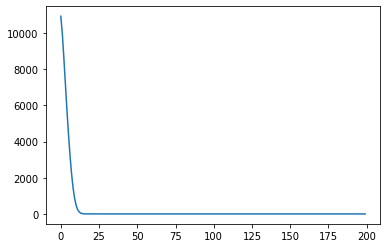

In [ ]:
plt.plot(details.history['val_loss'])
plt.show()

In [ ]:
loss, rmse_error_test = lrcn_model.evaluate(x_test, y_test, batch_size=1)

38/38 [==============================] - 0s 4ms/step - loss: 0.3916 - root_mean_squared_error: 0.6258


Loading model for predictions 

In [ ]:
lrcn_model = keras.models.load_model(path)

In [ ]:
prediction = np.mean(lrcn_model.predict(np.array(x_test))[1])
print("prediction", prediction)
print('actual', np.array(y_test)[1])

prediction 98.83963
actual [97.9]
